In [1]:
%load_ext autoreload
%autoreload 2

# Data Exploration - IOB, COB and BG
The notebook 0.01-rd-initial-data-exploration-cob.ipynd was an early attempt to understand COB data, the quality and integrity of it. This notebook will now look at the overall sample of those that we can confidently and easily offset the timestamps (i.e. those that only have only timezone associated), and then drill down to the selected candidates that will be used for the study, based on the criteria set out in 2.01-rd-candidate-selection-analysis.ipynb.

## Missingness from resampled data
Resampling data from irregular to regular intervals does not initially carry out imputation of missing values, so we will need to check the number of NaNs in the resampled data. This is important because we want to ensure that the data is complete and that there are no missing values that could affect the analysis. This will guide us on the methods used for analysis, the risks involved in introducing bias, and ultimately the methods used for imputation of missing values if this is strategy we choose to take. The following will analyse the level of missingness in the different resampled levels. in the data. The factors that will vary in the analysis are:
- The resampling interval (15 minutes, 30 minutes)
- The number of consecutive missing intervals (dependent on the resampling interval, e.g. 2 for 30 minutes, 4 for 15 minutes)
- The minimum number of nights (20, 3)
- The start and end times of the night period (e.g. 17:00 to 11:00, 22:00 to 06:00)
- The number of missing intervals (dependent on the resampling interval, e.g. 2 for 30 minutes, 4 for 15 minutes)

In [2]:
from src.sample_filter import SampleFilter
from src.configurations import FifteenMinute, ThirtyMinute
from datetime import time

2025-06-28 10:34:58.537 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: C:\Users\ross\OneDrive\Documents\Masters\Project\masters_project


In [43]:
from typing import List, Tuple

def plot_counts(counts: List[Tuple[int, int, int, int]]):
    import matplotlib.pyplot as plt
    import numpy as np
    from collections import defaultdict

    # counts: list of (max_length, missed_intervals, c, n)
    data = defaultdict(lambda: {'intervals': [], 'c': [], 'n': []})
    max_interval = max([i for _, i, _, _ in counts])
    print(max_interval)
    max_candidates = max([c for _, _, c, _ in counts])
    print(max_candidates)
    max_nights = max([n for _, _, _, n in counts])
    print(max_nights)
    for max_length, missed_intervals, c, n in counts:
        data[max_length]['intervals'].append(missed_intervals)
        data[max_length]['c'].append(c)
        data[max_length]['n'].append(n)

    fig, ax1 = plt.subplots(figsize=(10, 6))
    color_map = plt.get_cmap('tab10')
    colors = [color_map(i) for i in range(len(data))]

    ax2 = ax1.twinx()

    for idx, (max_length, vals) in enumerate(sorted(data.items())):
        color = colors[idx]
        ax1.plot(vals['intervals'], vals['c'], marker='o', linestyle='-', color=color, label=f'Candidates (max_length={max_length})')
        ax2.plot(vals['intervals'], vals['n'], marker='x', linestyle='--', color=color, label=f'Nights (max_length={max_length})')

    ax1.set_xlabel('Number of Missing Intervals Allowed')
    ax1.set_xticks(np.arange(0, max_interval+1, 1))
    ax1.set_ylabel('Count of Candidates')
    ax1.set_yticks(np.arange(0, max_candidates+1, 2))
    ax2.set_ylabel('Count of Nights')
    ax2.set_yticks(np.arange(0, max_nights+1, 100))

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize='small')

    fig.suptitle('Counts of Candidates and Nights vs Missing Intervals\nGrouped by max_length')
    fig.tight_layout()
    plt.grid()
    plt.show()

In [17]:

def get_counts(sampling, night_start, morning_end, min_nights, interval_range, break_range,):
    counts = []
    for missed_intervals in interval_range:
        for max_length in break_range:
            sample = SampleFilter(
                night_start=night_start,
                morning_end=morning_end,
                sampling=sampling,
                missed_intervals=missed_intervals,
                max_break_run=max_length,
                min_nights=min_nights,
            )
            c, n = sample.return_counts(logging=False)
            counts.append((max_length, missed_intervals, c, n))
    return counts

In [ ]:
# NOTE: At 15 min sampling this takes 14mins
interval_range = range(0,10)
break_range = [1,2,3]
night_start = time(17, 0)
morning_end = time(11, 0)
sampling = FifteenMinute()
min_nights = 30
missed_intervals = 12

min_counts_a = get_counts(sampling, night_start, morning_end, min_nights, interval_range, break_range,)
plot_counts(min_counts_a)

2025-06-28 13:28:35.012 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.
2025-06-28 13:28:55.083 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.
2025-06-28 13:29:15.835 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.
2025-06-28 13:29:41.650 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.
2025-06-28 13:30:07.063 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.
2025-06-28 13:30:27.532 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.
2025-06-28 13:30:51.435 | INFO     | src.nights:_calculate_overall_stats:11 - No s

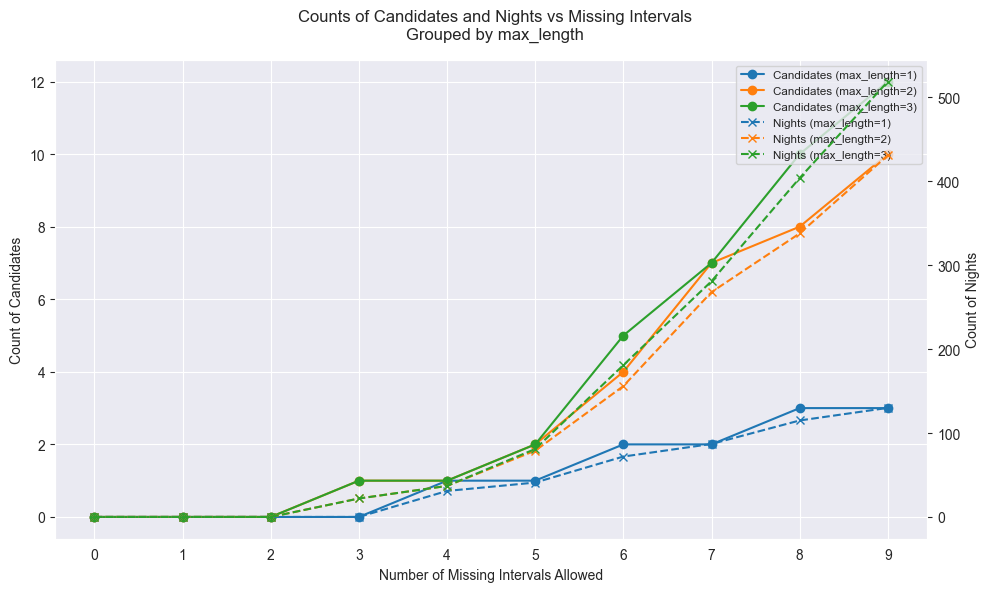

In [45]:
# NOTE: At 15 min sampling this takes ***
interval_range = range(0,10)
break_range = [1,2,3]
night_start = time(17, 0)
morning_end = time(11, 0)
sampling = FifteenMinute()
min_nights = 20
missed_intervals = 12

min_counts_b = get_counts(sampling, night_start, morning_end, min_nights, interval_range, break_range,)
plot_counts(min_counts_b)

2025-06-28 12:59:34.364 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.
2025-06-28 12:59:54.961 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.
2025-06-28 13:00:15.985 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.


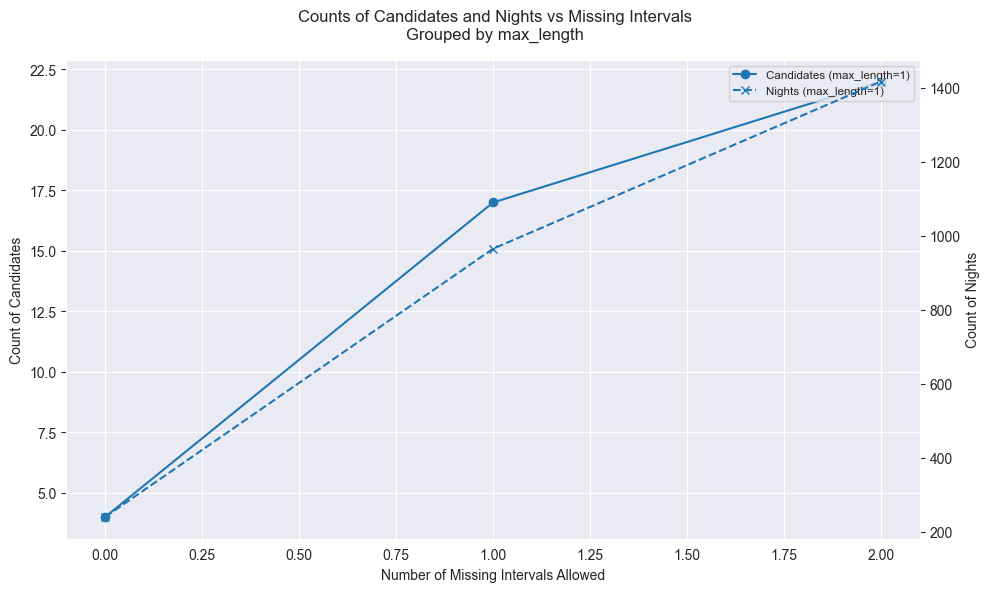

In [19]:
sampling = ThirtyMinute()
interval_range = range(0,3)
break_range = [1]
min_counts_b = get_counts(sampling, night_start, morning_end, min_nights, interval_range, break_range,)
plot_counts(min_counts_b)

It is now also clear that there are individuals with a significant amount of missing data for COB, but not totally missing COB data. This is likely due to the way that COB data is collected and processed, and it is important to note that this may affect the analysis. It will not be possible to cluster these individuals and needs to be another step in the process of selecting candidates. Lets look at the data, and find a criteria to use for selection. First, we can load the data without constraint for the period concerned.

In [61]:
night_start = time(17, 0)
morning_end = time(11, 0)
sampling = ThirtyMinute()
min_nights = 0
missed_intervals = 999
max_break_run = 999
sample = SampleFilter(
    night_start=night_start,
    morning_end=morning_end,
    sampling=sampling,
    missed_intervals=missed_intervals,
    max_break_run= max_break_run,
    min_nights=min_nights,
)

2025-06-28 14:31:39.634 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.
2025-06-28 14:31:59.796 | INFO     | src.nights:_calculate_overall_stats:11 - No stats per night have been calculated for 67167655. Returning no output.


Then we need to look at understanding the proportion of missing COB data in the sample for individuals and look an acceptable condition for selection. We need to maximise the number of COB values as it will impact the clustering and ability to find patterns with this in mind.

In [67]:
stats = sample.stats[['total_cob_nans', 'total_iob_nans', 'period_total_intervals', 'count_of_nights']].copy()
stats['total_intervals'] = stats['period_total_intervals'] * stats['count_of_nights']
stats['cob_missing_ratio'] = stats['total_cob_nans'] / stats['total_intervals']
stats['iob_missing_ratio'] = stats['total_iob_nans'] / stats['total_intervals']
cob_stats = stats[stats['cob_missing_ratio']>0.1].sort_values(by='cob_missing_ratio', ascending=False)
cob_stats[['count_of_nights','cob_missing_ratio']]

,count_of_nights,cob_missing_ratio
id,,
57176789,322,0.509058
68267781,291,0.467640
99296581,11,0.313131
72492570,36,0.266204
71397255,25,0.220000
41663654,2,0.166667
63725802,2,0.166667
73521474,21,0.125661


In [71]:
iob_stats = stats[stats[('iob_missing_ratio')]>0.00].sort_values(by='iob_missing_ratio', ascending=False)
iob_stats[['count_of_nights','iob_missing_ratio']]

,count_of_nights,iob_missing_ratio
id,,
68267781,291,0.318251
72492570,36,0.191358
63725802,2,0.166667
90398368,8,0.013889


Four patients have any IOB missing, and two of those have less than 30 nights. The other two we would been to drop if they are in our final cut. With COB, there are lots more missing values.